In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Reading image data for comparision and evaluation

In [2]:
img1 = imread('Fig0316(1)(top_left).tif')
img2 = imread('Fig0316(2)(2nd_from_top).tif')
img3 = imread('Fig0316(3)(third_from_top).tif')
img4 = imread('Fig0316(4)(bottom_left).tif')

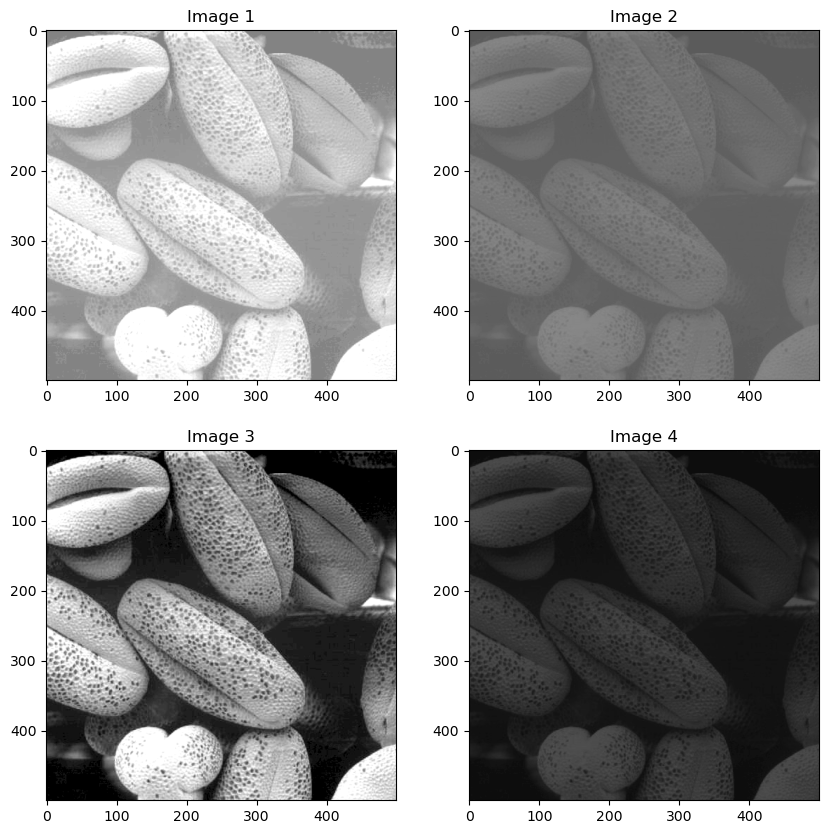

In [3]:
fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)
ax[0,0].imshow(img1,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(img2,cmap='gray',vmin=0,vmax=255)
ax[1,0].imshow(img3,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(img4,cmap='gray',vmin=0,vmax=255)
ax[0,0].title.set_text('Image 1')
ax[0,1].title.set_text('Image 2')
ax[1,0].title.set_text('Image 3')
ax[1,1].title.set_text('Image 4')
plt.show()

In [4]:
img1 # checking image data in array 

array([[132, 132, 132, ..., 191, 191, 184],
       [132, 132, 132, ..., 190, 190, 179],
       [132, 132, 132, ..., 175, 175, 166],
       ...,
       [149, 132, 132, ..., 248, 242, 242],
       [151, 138, 132, ..., 242, 242, 235],
       [156, 145, 132, ..., 240, 240, 224]], dtype=uint8)

Alternate method of histogram data retrival

In [5]:
# fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)
# ax[0,0].hist(img1)
# ax[0,1].hist(img2)
# ax[1,0].hist(img3)
# ax[1,1].hist(img4)
# plt.show()

Function that calclated frequency of each pixel intensity for creating a histogram

In [6]:
def create_hist(img):
    intensity, frequency = np.unique(img,return_counts=True)
    df = pd.DataFrame({'intensity':intensity,"frequency":frequency})
    return df

In [7]:
img1_hist = create_hist(img1)
img2_hist = create_hist(img2)
img3_hist = create_hist(img3)
img4_hist = create_hist(img4)
# images = [img1,img2,img3,img4]

Histograms of the image data

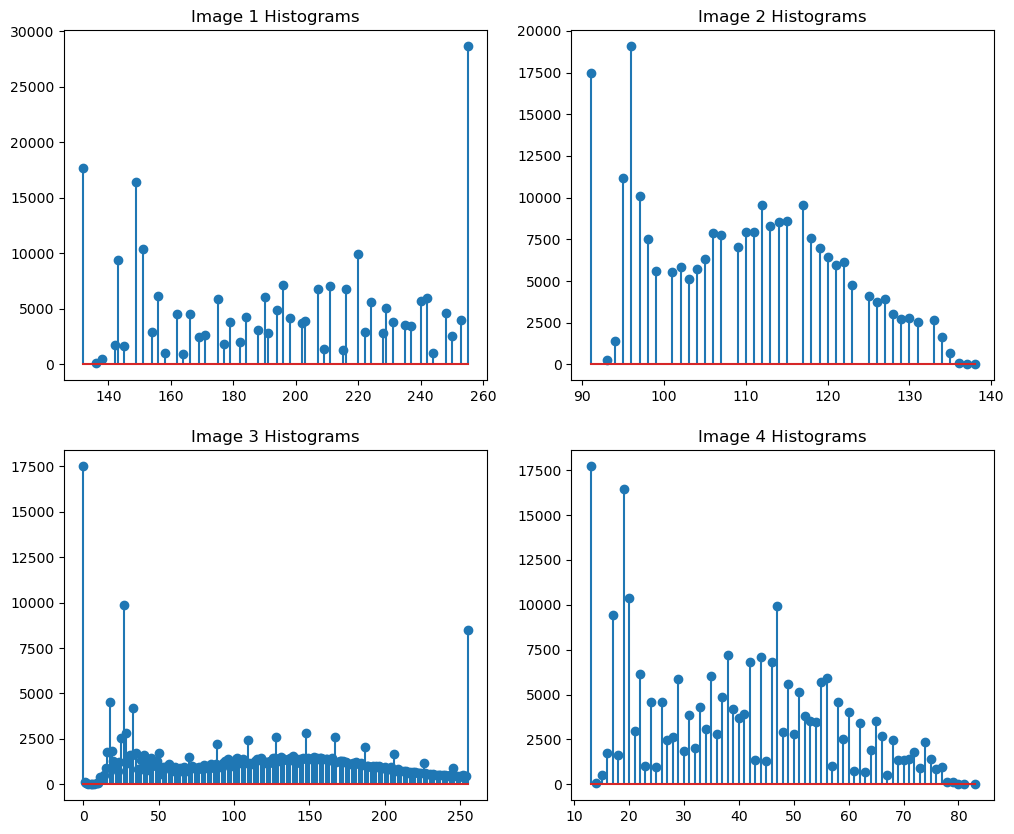

In [8]:
fig,ax = plt.subplots(figsize=(12,10),nrows=2,ncols=2)
ax[0,0].stem(img1_hist['intensity'],img1_hist['frequency'])
ax[0,1].stem(img2_hist['intensity'],img2_hist['frequency'])
ax[1,0].stem(img3_hist['intensity'],img3_hist['frequency'])
ax[1,1].stem(img4_hist['intensity'],img4_hist['frequency'])
ax[0,0].title.set_text('Image 1 Histograms')
ax[0,1].title.set_text('Image 2 Histograms')
ax[1,0].title.set_text('Image 3 Histograms')
ax[1,1].title.set_text('Image 4 Histograms')
plt.show()

From the above data and the plotted respective images we can conclude that: 
* Image 1 is bright
* Image 2 is low contrast
* Image 3 is equalised
* Image 4 is dark

Steps to map intensities

In [9]:
nk = sum(img1_hist['frequency'])
img1_hist['pdf'] = [round(n/nk,3) for n in img1_hist['frequency']]
img1_hist['cdf'] = np.cumsum(img1_hist['pdf'])
img1_hist['sk'] = [round(7*n,0) for n in img1_hist['cdf']]
img1_hist.head(10)

,intensity,frequency,pdf,cdf,sk
0,132,17718,0.071,0.071,0.0
1,136,96,0.000,0.071,0.0
2,138,506,0.002,0.073,1.0
3,142,1750,0.007,0.080,1.0
4,143,9441,0.038,0.118,1.0
5,145,1642,0.007,0.125,1.0
6,149,16457,0.066,0.191,1.0
7,151,10381,0.042,0.233,2.0
8,154,2945,0.012,0.245,2.0
9,156,6149,0.025,0.270,2.0


In [10]:
image_test = np.ravel(img1)
image_test

array([132, 132, 132, ..., 240, 240, 224], dtype=uint8)

In [11]:
mapping = dict(zip(img1_hist['intensity'],img1_hist['sk'])) 
new_image = np.vectorize(mapping.get)(img1)
new_image

array([[0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 2.],
       ...,
       [1., 0., 0., ..., 6., 6., 6.],
       [2., 1., 0., ..., 6., 6., 5.],
       [2., 1., 0., ..., 6., 6., 5.]])

In [12]:
img1

array([[132, 132, 132, ..., 191, 191, 184],
       [132, 132, 132, ..., 190, 190, 179],
       [132, 132, 132, ..., 175, 175, 166],
       ...,
       [149, 132, 132, ..., 248, 242, 242],
       [151, 138, 132, ..., 242, 242, 235],
       [156, 145, 132, ..., 240, 240, 224]], dtype=uint8)

<bound method DataFrame.nunique of    intensity  frequency
0        0.0      17814
1        1.0      29796
2        2.0      35689
3        3.0      34687
4        4.0      42383
5        5.0      33718
6        6.0      27254
7        7.0      28659>


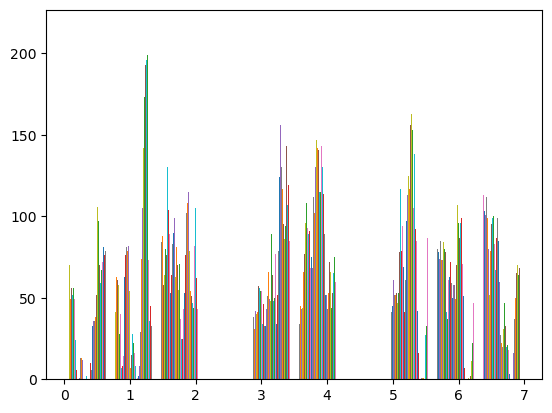

In [13]:
new_img1_hist = create_hist(new_image)
print(new_img1_hist.nunique)
plt.hist(new_image)
plt.show();

In [14]:
def equalise_histogram(img_hist_data):
    img_hist = img_hist_data
    nk = sum(img_hist['frequency'])
    img_hist['pdf'] = [round(n/nk,3) for n in img_hist['frequency']]
    img_hist['cdf'] = np.cumsum(img_hist['pdf'])
    img_hist['sk'] = [round(7*n,0) for n in img_hist['cdf']]
    return img_hist


def equalise_image(img):
    img_hist = create_hist(img)
    img_hist = equalise_histogram(img_hist)
    image_data = np.ravel(img)
    mapping = dict(zip(img_hist['intensity'],img_hist['sk'])) 
    equalised_image = np.vectorize(mapping.get)(img)
    return equalised_image
    

In [15]:
equalise_image(img1)

array([[0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 3.],
       [0., 0., 0., ..., 3., 3., 2.],
       ...,
       [1., 0., 0., ..., 6., 6., 6.],
       [2., 1., 0., ..., 6., 6., 5.],
       [2., 1., 0., ..., 6., 6., 5.]])

Comparing Histograms

In [16]:
img1_hist=equalise_histogram(img1_hist)
img2_hist=equalise_histogram(img2_hist)
img3_hist=equalise_histogram(img3_hist)
img4_hist=equalise_histogram(img4_hist)

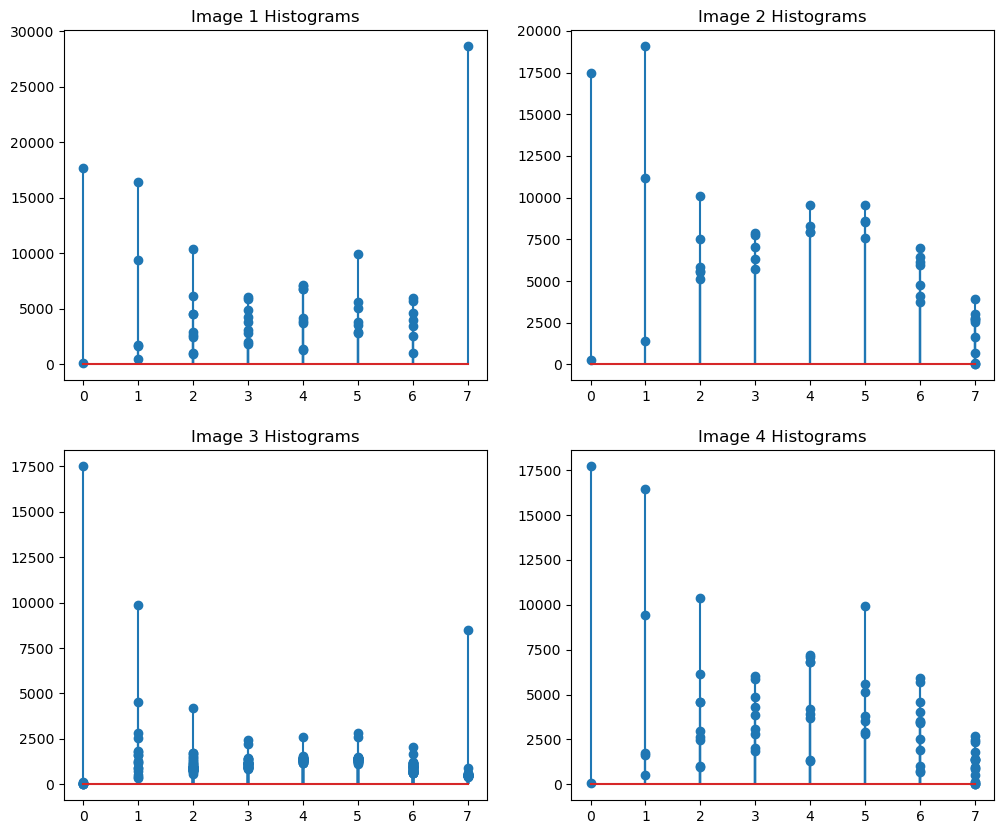

In [17]:
fig,ax = plt.subplots(figsize=(12,10),nrows=2,ncols=2)
ax[0,0].stem(img1_hist['sk'],img1_hist['frequency'])
ax[0,1].stem(img2_hist['sk'],img2_hist['frequency'])
ax[1,0].stem(img3_hist['sk'],img3_hist['frequency'])
ax[1,1].stem(img4_hist['sk'],img4_hist['frequency'])
ax[0,0].title.set_text('Image 1 Histograms')
ax[0,1].title.set_text('Image 2 Histograms')
ax[1,0].title.set_text('Image 3 Histograms')
ax[1,1].title.set_text('Image 4 Histograms')
plt.show()

Equalising all the images:

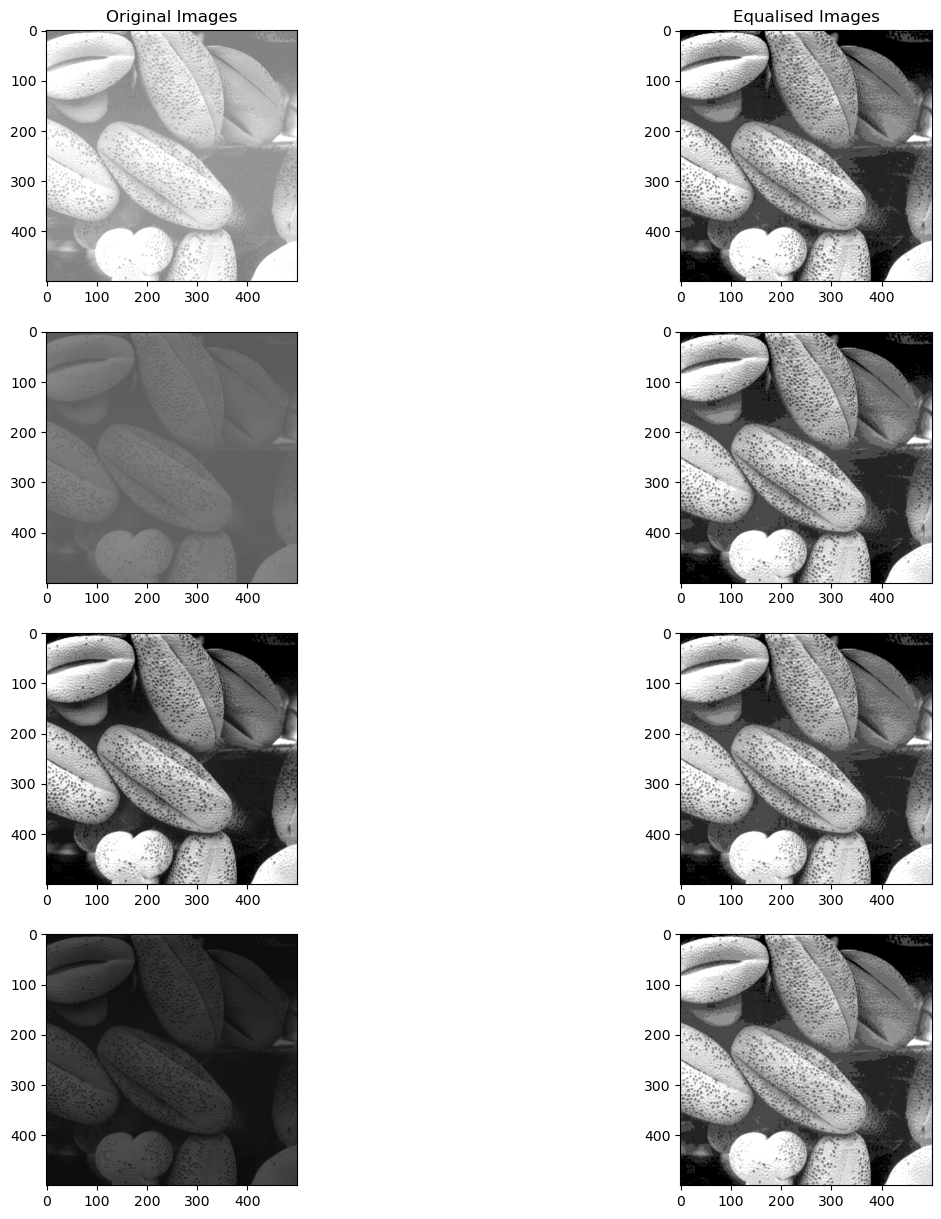

In [18]:
fig,ax = plt.subplots(figsize=(15,15),nrows=4,ncols=2)
ax[0,0].imshow(img1,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(equalise_image(img1),cmap='gray',vmin=0,vmax=7)
ax[1,0].imshow(img2,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(equalise_image(img2),cmap='gray',vmin=0,vmax=7)
ax[2,0].imshow(img3,cmap='gray',vmin=0,vmax=255)
ax[2,1].imshow(equalise_image(img3),cmap='gray',vmin=0,vmax=7)
ax[3,0].imshow(img4,cmap='gray',vmin=0,vmax=255)
ax[3,1].imshow(equalise_image(img4),cmap='gray',vmin=0,vmax=7)
ax[0,0].title.set_text('Original Images')
ax[0,1].title.set_text('Equalised Images')
plt.show()

We can conclude that we can convert imbalanced images to equalised i.e. balanced images that have pixel intensities distributed equally. Also observed that there is still a slight change in the original equalised image and the image obtained by putting this through the equaliser.